In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

$$f(x_1,x_2) = x_1^2+ x_2^2$$

In [2]:
def f(x):
    return x[:,0]**2 + x[:,1]**2

In [3]:
#np.random.seed(0)
x = np.random.uniform([-10],[10], size = (1000,2))

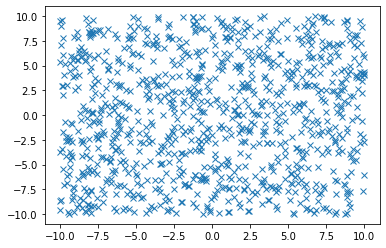

In [4]:
plt.plot(x[:,0],x[:,1],'x')
plt.show()

In [5]:
y = f(x)

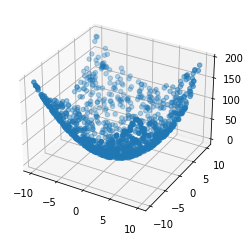

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

$$\hat{y} = \hat{W}_1h_1 + \hat{W}_2h_2$$

$$h_1 = \sigma(z_1)$$
$$h_2 = \sigma(z_2)$$

$$z_1 = W_{11}x_1 + W_{12}x_2 + b_1$$
$$z_2 = W_{21}x_1 + W_{22}x_2 +b_2$$

$$\sigma(x) =\frac{1}{1+e^{-x}}$$

In [7]:
def sigma(x):
    return 1/(1+np.exp(-x))

In [8]:
y = y.reshape((len(y), 1))

# W = [
#     np.array([[0.1,0.15],[0.21,0.12]]),
#     np.array([[0.2,0.13],[0.11,-0.12]]),
#     np.array([[0.11,0.18]]),
# ]

# B = [
#     np.array([0.,0.]),
#     np.array([0.,0.]),
# #    np.array([0.])
# ]
# (2, 10, 1)

def init_params(layers):
    W = []
    B = []
    for i in range(1, len(layers)):
        B.append(np.zeros((layers[i],)))
        W.append(np.random.uniform(0.0, 0.3, size=(layers[i], layers[i-1])))
    return W, B

W, B = init_params((2, 10, 1))

print(f"W: {W}\n")
print(f"B: {B}")

W: [array([[0.02054925, 0.03518161],
       [0.16578012, 0.01535821],
       [0.2270517 , 0.08154451],
       [0.21738529, 0.28872718],
       [0.00430141, 0.00236474],
       [0.22040325, 0.13286405],
       [0.23939253, 0.29505286],
       [0.06738761, 0.02409865],
       [0.26202555, 0.273925  ],
       [0.28862998, 0.00806076]]), array([[0.16862686, 0.155851  , 0.29939839, 0.29897456, 0.22135865,
        0.18798705, 0.17114239, 0.2927968 , 0.13041645, 0.03984644]])]

B: [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.])]


In [9]:
def forward(x):
    h = x.T
    for i in range(len(W)):
        z = W[i].dot(h).T + B[i]
        h = sigma(z).T
    return z

In [10]:
y_hat = forward(x)
print(y_hat.shape)

(1000, 1)


In [11]:
# def update(W, b, W_hut, x, y, lr): 
#     lr /= len(x)
#     k = 5
     
#     #print(f"x:\n{x[:k]}\n\nb:\n{b}\n\nW:\n{W}\n\nW_hut:\n{W_hut}\n")
    
#     z = W.dot(x.T).T + b
#     h = sigma(z).T
#     y_hat = W_hut.dot(h)
    
#     #print(f"z:\n{z[:k]}\n\nh:\n{h[:k]}\n\ny_hat:\n{y_hat[:k]}\n")
    
#     W_hut_new = W_hut - lr * 2 * (y_hat - y).dot(h.T)
#     W_new = W - lr * (((h * (1-h)).T * W_hut).T * 2 * (y_hat - y)).dot(x)
#     b_new = b - lr * ((h * (1-h)).T * W_hut).T.dot(2 * (y_hat - y))
    
#     #print(f"W_hut_new:\n{W_hut_new}\n\nW_new:\n{W_new}\n\nb_new:\n{b_new}\n")

#     return W_new, b_new, W_hut_new

# print(update(W, b, W_hut, x, y, 0.1))

<http://matrixmultiplication.xyz/>

In [12]:
def update(W, b, x, y, lr):
    num_x = len(x)
    
    num_layers = len(W)
    #print(num_layers)
    delta_W = [np.zeros(w.shape) for w in W]
    delta_B = [np.zeros(b.shape) for b in B]
    
    # forward
    z = []
    h = [x.T]
    for i in range(len(W)):
        z.append(W[i].dot(h[-1]).T + B[i])
        #z = W[i].dot(h[-1]).T + B[i]
        h.append(sigma(z[-1]).T)
    #h.append(W[-1].dot(h[-1]).T)
    
    # compute gradients
    db = 2*(z[-1] - y)
    delta_B[-1] = db.sum(axis=0)
    delta_W[-1] = db.T.dot(h[-2].T)
    
    for i in range(2, num_layers+1):
        db = np.dot(db, W[-i+1]) * (h[-i]*(1-h[-i])).T
        delta_B[-i] = db.sum(axis=0)
        delta_W[-i] = db.T.dot(h[-i-1].T)
    
    #print(f"delta_W: {delta_W}")
    #print(f"delta_B: {delta_B}")
    # adjust weights and biases
    W_new = [w - lr/num_x * delta_w for w,delta_w in zip(W, delta_W)]
    b_new = [b - lr/num_x * delta_b for b,delta_b in zip(B, delta_B)]
    
    return W_new, b_new

In [13]:
n = 300
lr = 0.01
num_at_once = 10000

for i in range(n):

    start = 0
    while start < len(x):
        W, B = update(W, B, x[start:start+num_at_once], y[start:start+num_at_once], lr)
        start += num_at_once

    if i % 20 == 0 or i == n-1:
        y_hat = forward(x)
        C = np.sqrt(((y - y_hat)**2)).mean()
        print(f"Epoch {i} cost: {C}")

Epoch 0 cost: 62.363137811071155
Epoch 20 cost: 38.12715065529256
Epoch 40 cost: 36.14808578665755
Epoch 60 cost: 34.756861803154955
Epoch 80 cost: 34.64857398650359
Epoch 100 cost: 33.139006406254126
Epoch 120 cost: 31.824673313296444
Epoch 140 cost: 31.058659985048884
Epoch 160 cost: 28.310024982172056
Epoch 180 cost: 28.643871371046316
Epoch 200 cost: 25.9966403474845
Epoch 220 cost: 24.49414051300388
Epoch 240 cost: 25.121188795978437
Epoch 260 cost: 23.976537744563057
Epoch 280 cost: 23.39440913185035
Epoch 299 cost: 21.378623022691123


In [14]:
# start = datetime.now()
# for _ in range(500):
#     W, B = update(W, B, x, y, 0.1)
    
# print(datetime.now() - start)

In [15]:
# n = 100
# lr = 0.01

# for i in range(n):
#     W, B = update(W, B, x, y, lr)
#     if i % 20 == 0 or i == n-1:
#         y_hat = forward(x)
#         C = np.sqrt(((y - y_hat)**2)).mean()
#         print(f"Epoch {i} cost: {C}")

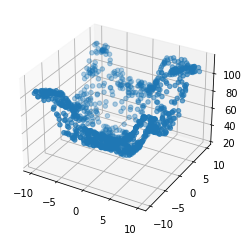

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y_hat)